# Unit 9 Lecture 1 - Artificial Intelligence: Supervised Learning

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 
https://github.com/igaribay/DSSwithPython/blob/master/DSS-Week09/Notebook/DSS-Unit09-Lecture01.2018.ipynb

## Notebook Learning Objectives
After studying this notebook students should be able to:
- Undertand basic concepts on artificial intelligence and machine learning
- Develop supervised learning models using Scikit-Learn

# Overview

Artificial intelligence (AI) is making its way into all industries. Companies that are not already exploiting the benefits of the "AI revolution" are frantically upgrading their business models to remain competitive. No doubt artificial intelligence is here to stay. The US government and private sector are investing heavily to remain the world leader on this crucial field.

The AI that is currently used in industry, it is based on statistical methods and artificial intelligence algorithms developed on the 70's and 80's. It is just now that those technologies have come to age, in part, thanks to the availability of large amounts of data and the unprecedented, inexpensive and readily available computational power. Of course, algorithms have continually become more efficient and powerful. An example of these advances **deep learning**. Deep learning have brought orders of magnitude improvement in accuracy compared with traditional learning algorithms. For more information about deep learning see <a href="https://arxiv.org/pdf/1404.7828.pdf">reference 1</a> and for a Python library for deep learning see <a href="https://pytorch.org">reference 2</a>. Current AI research focus on going beyond statistical learning and partner recognition (where deep learning is the reigning king) into the more challenging problems of infusing AI  with _common-sense reasoning_, with the ability to explain its actions or decisions, so called _explainability_, and in general, making AIs become better _human partners_. For an example of this **third wave of AI** please see <a href="https://www.youtube.com/watch?time_continue=2564&v=7ROelYvo8f0">reference 4</a>.

This class have provided you with the programming, data, and statistical foundations needed to understand a particular type of artificial intelligence: machine learning. Machine learning comes in two main flavors: 
- supervised learning
- unsupervised learning

A supervised learning algorithm work by learning by example and with a "supervisor" that tell the algorithm when it got it right and when it made a mistake. After the supervisor "trains" the algorithm using many examples (training data set), then the algorithm is presented with a never seen before example (test data set) in order to test if the algorithm was able to "learn" from the training data.

We will use the Python library **Scikit-Learn** (see <a href="http://scikit-learn.org/stable/index.html">reference 3</a>). This library is a comprehensive and state-of-the-art collection of machine learning algorithms ready to use.


# Introduction to Supervised Learning through Scikit-Learn

## What is scikit-learn?
Scikit is a machine learning python library built off of packages you have recently been introduced to such as numpy, scipy and matplotlib. For more information, visit the <a href='http://scikit-learn.org/stable/index.html#'>scikit-learn homepage</a>

The library contains function in the following machine learning categories:
- <a href='http://scikit-learn.org/stable/supervised_learning.html#supervised-learning'> Classification</a> 
- <a href='http://scikit-learn.org/stable/supervised_learning.html#supervised-learning'> Regression </a> 
- <a href='http://scikit-learn.org/stable/modules/clustering.html#clustering'> Clustering </a> 
- <a href='http://scikit-learn.org/stable/modules/decomposition.html#decompositions'>Dimensionality Reduction</a>
- <a href='http://scikit-learn.org/stable/model_selection.html#model-selection'>Model Selection</a> 
- <a href='http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing'>Preprocessing </a> 

Scikit-learn should be installed along with your Anaconda3 installation. However, if this is not the case, follow the installation instructions provided by scikit-learn <a href='http://scikit-learn.org/stable/install.html'>here</a>

Next, lets import some of the packages we will use and see what version you are running!

In [6]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import pandas as pd
print('The pandas version is {}'.format(pd.__version__))
#import matplotlib
import matplotlib.pyplot as plt
print('The matplotlib version is {}'.format(matplotlib.__version__))
import numpy as np
print('The numpy version is {}'.format(np.__version__))

The scikit-learn version is 0.19.1.
The pandas version is 0.23.0
The matplotlib version is 2.2.2
The numpy version is 1.14.3


## What is supervised learning?

Supervised learning are algorithms that learn patterns from a data. They are trained useing a subset of the data. This data is labeled. A labeled dataset represents a set of problems for which we know the answers. Supervised learning alrorithms aim to generalize their learning in order to be able to acurately provide an answer to all possible inputs, in particular inputs that are not part of their training dataset. 

Examples of techniques in supervised learning:</p> 
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression'>logistic regression</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/svm.html'>support vector machines</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/tree.html'>decision trees</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>random forest</a></li>

We will focus on classification tasks in this notebook. **Classification** is the prediction of discrete variables i.e. YES/NO. Classification is regarded as the problem of finding $h(x): \mathbb{R^d}\to\mathbb{K}$ that maps an input space in $\mathbb{R^d}$ onto a discrete set of $k$ target outputs or classes $\mathbb{K}=\{1,...,k\}$
In contrast, regression problems involve prediction of continuous variables. 

Input data into sklearn objects are structured in numpy arrays with size $[n_{samples}, n_{features}]$.

$$\text{feature matrix: } \mathbf{X} = 
\begin{pmatrix} 
x_{11} & x_{12} & \cdots & x_{1d} \\ 
x_{21} & x_{22} & \cdots & x_{2d} \\
x_{31} & x_{32} & \cdots & x_{3d} \\
\vdots & \vdots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} 
\end{pmatrix}
$$
$$ 
\text{label vector: }
\mathbf{y^T} = [y_1, y_2, y_3,\cdots, y_n]
$$

# Case 1: Lending Club 
This dataset is provided by the Lending Club, a peer-to-peer lending company offering loans funded by other people acting as hub connection borrowers and investors. The potential investors assesses the risk of clients applying for a loan of a certain amount and offer to fund a portion of the loan. If enough investors offer to fund the loan, then the loan is successful and the client can receive the money they asked for, or at least an amount close the complete loan.

A **failed loan** occurs when the investors (<code>funded_amnt_inv</code>) do not provided funds to cover at least %5 of the requested loan amount (<code>loan_amnt</code>). 

> The task is to predict if a loan application will fail to be funded or not

We define the finary classification task as the problem of sucesfully predict when a loan will fail. The **failed loans** are defined as: 

$$\text{Binary classification task:  }\frac{loan-funded}{loan}\geq0.95$$ 

Lending Club **loan data** and **declined loan data**, as well as a complete data dictionary can be downloaded <a href='https://www.lendingclub.com/info/download-data.action'> here for years 2007-2018</a>. Relevant data columns and their description follow:



<table>
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
   <tr>
        <td>annual_inc</td>
        <td>The annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
        <td>delinq_2yrs</td>
        <td> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
</td>
    </tr>
    <tr>
        <td>dti</td>
        <td> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
</td>
    </tr>
    <tr>
        <td>earliest_cr_line</td>
        <td> The month the borrower's earliest reported credit line was opened
</td>
    </tr>
    <tr>
        <td>emp_length</td>
        <td> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
</td>
    </tr>
    <tr>
        <td>home_ownership</td>
        <td> The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
</td>
    </tr>
    <tr>
        <td>installment</td>
        <td> The monthly payment owed by the borrower if the loan originates.
</td>
    </tr>
    <tr>
        <td>int_rate</td>
        <td> Interest Rate on the loan
</td>
    </tr>
    <tr>
        <td>is_inc_v</td>
        <td> Indicates if income was verified by LC, not verified, or if the income source was verified
</td>
    </tr>
    <tr>
        <td>last_fico_range_high</td>
        <td> The last upper boundary of range the borrower’s FICO belongs to pulled.
</td>
    </tr>
    <tr>
        <td>last_fico_range_low</td>
        <td> The last lower boundary of range the borrower’s FICO belongs to pulled.
</td>
    </tr>
    <tr>
        <td>fico_range_high</td>
        <td> The upper boundary of range the borrower’s FICO belongs to.
</td>
    </tr>
    <tr>
        <td>fico_range_low</td>
        <td> The lower boundary of range the borrower’s FICO belongs to.
</td>
    </tr>
    <tr>
        <td>mths_since_last_delinq</td>
        <td> The number of months since the borrower's last delinquency.
</td>
    </tr>
    <tr>
        <td>mths_since_last_major_derog</td>
        <td> Months since most recent 90-day or worse rating
</td>
    </tr>
     <tr>
        <td>open_acc</td>
        <td> The number of open credit lines in the borrower's credit file.
</td>
    </tr>
    <tr>
        <td>term</td>
        <td> The number of payments on the loan. Values are in months and can be either 36 or 60.
</td>
    </tr>
    <tr>
        <td>total_acc</td>
        <td> The total number of credit lines currently in the borrower's credit file
</td>
    </tr>
    <tr>
        <td>loan_amnt</td>
        <td> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>


</table>

Now, lets read the data into a <code>DataFrame</code>, lets call our DataFrame <code>df_lend</code>

In [8]:
keep_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'total_acc']
df_lend = pd.read_csv('../Data/LoanStats3a.csv', skiprows=1, low_memory=False)
df_lend = df_lend[keep_cols]
print(df_lend.shape)
print(df_lend.columns.tolist())
df_lend.head()

(42538, 13)
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'total_acc']


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0


We will encode our binary target variable using the logic described earlier and visualize the results: 

$$\frac{loan-funded}{loan}\geq0.95$$ 

In [15]:
loan = df_lend['loan_amnt'].values
funded = df_lend['funded_amnt_inv'].values
targets = np.abs(loan-funded)/loan

df_lend['targets'] = targets
y = [-1 if t >= .95 else 1 for t in targets]
df_lend['failed_loan'] = y
df_lend['failed_loan'].value_counts()
print "Examples of Failed Loans"
print df_lend['failed_loan'].tail() #examples of failed loans from data
df_lend.tail()

Examples of Failed Loans
42533    1
42534   -1
42535   -1
42536    1
42537    1
Name: failed_loan, dtype: int64


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,failed_loan
42533,2525.0,2525.0,225.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,10.00,NaN,NaN,NaN,0.910891,1
42534,6500.0,6500.0,0.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,4.00,NaN,NaN,NaN,1.000000,-1
42535,5000.0,5000.0,0.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,8.81,NaN,NaN,NaN,1.000000,-1
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
42537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


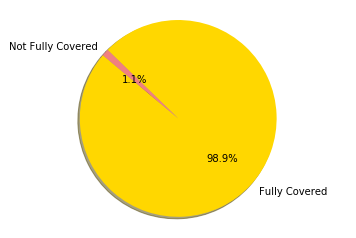

In [19]:
labels = 'Fully Covered', 'Not Fully Covered'
sizes = df_lend['failed_loan'].value_counts()
sizes = [sizes[1], sizes[-1] ]
colors = ['gold', 'lightcoral']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot_ = plt.axis('equal')

Note that there is a significant disporportion of positive labels to negative ones, making the dataset unbalanced. This can have drastic consequences for a classifier.

Larger deviation: 7896
Total: 34639


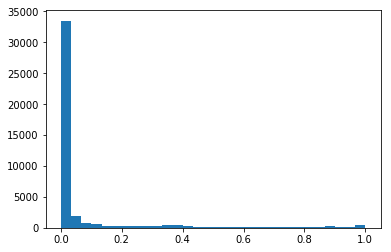

In [20]:
loan = df_lend['loan_amnt'].values
funded = df_lend['funded_amnt_inv'].values
targets = np.abs(loan-funded)/loan

df_lend['targets'] = targets
wrk_records = np.where(~np.isnan(targets))
y = targets[wrk_records]>=0.05
plt.hist(targets[wrk_records],bins=30)

print('Larger deviation: {}'.format(np.sum(y)))
print('Total: {}'.format(np.sum(1-y)))

<p style="font-size: 16px">Now for a quick introduction in the functionality of sklearn. We will begin with the k-nearest neighbor clustering algorithm. For more details, see pages 462-470 in Python for Data Science Handbook by Jake VanderPlas</p>
<h2>What is K-Nearest Neighbor?</h2>
<p style="font-size: 16px">This algorithm, when used for classification, uses the neighboring values of a particular input value to make a prediction. The input is assigned to the class most common among its $k$ nearest neighbors where $k\in\mathbf{R}$. The parameter $k$ is defined in the beginning as a hyperparameter, or a configuration that is prior to the model fit and is not estimated from the data but can be tuned to be more beneficial to the fitting of the model on the data. Determining the distance between the input value and other values is commonly done by Euclidean distance for continuous variables or Hamming distance for discrete variables. We will not go into too much detail here, but we will use this algorithm as a starting example on sklearn. For more information on sklearn's package, see the <a href='http://scikit-learn.org/stable/modules/neighbors.html#neighbors'>sklearn.neighbors documentation.</a>
<br><br>
One thing to note is this algorithm is computation heavy. This is because it must hold all other values in memory in order to measure the closest $k$ values to the input value.</p>

<h3>Training a Model with sklearn 5.3</h3>
<p style="font-size: 16px">To fit the model, we will use sklearn's object oriented interface. Firstly we create an object, which we name 'model'. We then can use the model.fit method to set the state of the object based on the training data. The data passed to the method must be in a two dimensional numpy array $\mathbf{X}$ of shape(n_samples, n_predictors holding the feature matrix and a one-dimensinal numpy array $\mathbf{y}$ that holds the response variable values. To view the documentaiton on this method, <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>visit here</a>.</p>

<p style="font-size: 16px">Once you have fit the model using the appropriate parameters passed to the fit method, the new state of the model object is stored in instances attributes with a trailing underscore '\_' (i.e. model.coefficients_). The new state can also be accessed from different methods, where the instance will return the new state in response to a method call (i.e. get_params).</p>

<p style="font-size: 16px">Estimator objects that can generate predictions provide a model.predict method. In the case of regression, model.predict will return the predicted regression values, $\hat{\mathbf{y}}$.


In [21]:
from sklearn import neighbors
from sklearn import datasets
import pickle

# we will use a smaller dataset for example sake
ofname = open('../Data/dataset_small.pkl','rb') 
(X,y) = pickle.load(ofname)

#Create an instance of K-nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=11)

#Train the classifier
knn.fit(X, y)

#Compute the prediction according to the model
y_pred = knn.predict(X)

print("Complete!")

Complete!


<p style="font-size: 16px">Sklearn's estimators come with a score method that calculates the accuracy of the model based on the predicted values.</p>

In [11]:
knn.score(X,y)

0.8316425120772947

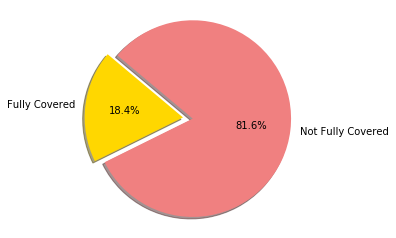

In [12]:
labels = 'Fully Covered', 'Not Fully Covered'
sizes = df_lend['failed_loan'].value_counts()

# np.where(condition, val if true, val if false)
sizes = [np.sum(np.where(y==1,1,0)), np.sum(np.where(y==-1,1,0))]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
ply_ = plt.axis('equal')

<p style="font-size: 16px">This unbalanced labeling means that if we <b>always</b> predicted the loan will be fully funded, we would be correct 81.4% of the time, very very close to the accuracy of our model. This demonstrates that accuracy may not be the best metric for understanding the the predictive power of our classifier.A better matrix is the <i>confusion matrix</i>.</p>

<table style='border-style : hidden'>
    <tr>
        <th></th>
        <th>Positive</th>
        <th>Negative</th>
        <th></th>
    </tr>
    <tr>
        <th>Positive</th>
        <td>TP: True Positive, when correctly predicted positively</td>
        <td>FP: False Positive, when incorrectly predicted positively</td>
        <td>$\to$Precision $\frac{TP}{TP+FP}$</td>
    </tr>
    <tr>
        <th>Prediction Negative</th>
        <td>FN: False Negative, when incorrectly predicted negative</td>
        <td>TN: True Negative, when correctly predicted negative</td>
        <td>$\to$Negative Predictive Value $\frac{TN}{TN+FN}$</td>
    </tr>
    <tr>
        <th></th>
        <td>$$\downarrow$$Sensitivity (Recall) $\frac{TP}{TP+FN}$</td>
        <td>$$\downarrow$$Specificity $\frac{TN}{TN+FP}$</td>
        <th></th>
    </tr>
<table>

<br>
$$\text{accuracy: }=\frac{TP+TN}{TP+TN+FP+FN}$$

In [13]:
confusion_matrix = dict()
confusion_matrix['TP'] = np.sum(np.logical_and(y_pred==-1,y==-1))
confusion_matrix['TN'] = np.sum(np.logical_and(y_pred==1,y==1))
confusion_matrix['FP'] = np.sum(np.logical_and(y_pred==-1,y==1))
confusion_matrix['FN'] = np.sum(np.logical_and(y_pred==1,y==-1))
pd.DataFrame(data=confusion_matrix, index=['results'])

,FN,FP,TN,TP
results,7,690,73,3370


<p style="font-size: 16px">Sklearn also has a method for this to make calculation easier. For a more elaborate example of how to use this, <a href='http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py'>visit here</a>.</p>

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y)

array([[3370,  690],
       [   7,   73]], dtype=int64)

<h3>Training and Testing Subsets 5.6</h3>
<p style="font-size: 16px">We have previously used full dataset for fitting the mdoek and evaluating the model, this is not good practice. It is better practice to use a subset of the data to train on and then test the accuracy of your model with a smaller subset of data that was not part of your training dataset. This is because we want to compare the <i>in-sample error rate</i> $E_{in}$ or the error on values in the training set and <i>out of sample error</i> $E_{out}$ which is the generalization error on unseen data, or our test set.</p>

$$E_{in}=\frac{1}{N}\sum_{i=1}^{N}e(x_i, y_i)$$
$$E_{out}=E_{xy}(e(x,y))$$
$$\text{ where } e(x_i, y_i)=I[h(x)=y_i]= 
\begin{cases}
    1     & \quad \text{if } h(x_i)=y\\
    0 & \quad \text{otherwise }
  \end{cases}$$
$$\text{observe that }E_{out}\geq E_{in}$$

<p style="font-size: 16px">The goal of model learning is to minimize the genearalization error. Desirable:</p>
<li>$E_{in}\to 0$</li>
<li>$E_{out}\approx E_{in}$</li>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split splits the data into random subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=y.size)  
print('Training shape: {}, training targets shape: {}'.format(X_train.shape, y_train.shape))
print('Testing shape: {}, testing targets shape: {}'.format(X_test.shape, y_test.shape))

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Check on the training set and visualize performance
y_pred_train =knn.predict(X_train)
y_pred_test = knn.predict(X_test)

results = dict()
train_cm = confusion_matrix(y_train, y_pred_train)
results['Training'] = {'classification_acc': accuracy_score(y_pred_train, y_train),
                      'TP': train_cm[0,0], 'FP': train_cm[0,1],
                      'FN': train_cm[1,0], 'TN': train_cm[1,1]}

test_cm = confusion_matrix(y_test, y_pred_test)
results['Test'] = {'classification_acc': accuracy_score(y_pred_test, y_test),
                      'TP': test_cm[0,0], 'FP': test_cm[0,1],
                      'FN': test_cm[1,0], 'TN': test_cm[1,1]}

pd.DataFrame(data=results)


Training shape: (2898L, 15L), training targets shape: (2898L,)
Testing shape: (1242L, 15L), testing targets shape: (1242L,)


,Test,Training
FN,155.000000,0.0
FP,161.000000,0.0
TN,64.000000,544.0
TP,862.000000,2354.0
classification_acc,0.745572,1.0


# References

1. Deep Learning, https://arxiv.org/pdf/1404.7828.pdf
2. Pytorch, Deep Learning Python Library, https://pytorch.org
3. Scikit-Learn, Python Library for Machine Learning, http://scikit-learn.org/stable/index.html
4. Next Generation AI: Common Sense, https://www.youtube.com/watch?time_continue=2564&v=7ROelYvo8f0

_Last updated on 10.18.18 2:11am<br>
(C) 2018 Complex Adaptive Systems Laboratory all rights reserved._